In [3]:
!pip install scikit-learn

In [7]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [1]:
#Downloading the dataset
!git clone 'https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet.git'

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 14.40 MiB/s, done.
Updating files: 100% (3264/3264), done.


In [5]:
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/Brain-Tumor-Classification-DataSet'):
   for filename in filenames:
       print(os.path.join(dirname, filename))

/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(2).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(82).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(10).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(31).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(86).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(11).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(54).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(88).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(100).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(42).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(20).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(39).jpg
/content/Brain-Tumor-Classification-DataSet/Testing/

In [8]:
dataset = '/content/Brain-Tumor-Classification-DataSet'

In [9]:
#Defining class labels and mapping
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
label_mapping = {}

for i in range(len(class_labels)):
  label_mapping[i] = class_labels[i]


In [14]:
#Load Dataset
x = []
y = []

for i, class_label in enumerate(class_labels):
  train_path = os.path.join(dataset, 'Training', class_label)
  test_path = os.path.join(dataset, 'Testing', class_label)

  for filename in os.listdir(train_path):
    if filename.endswith('.jpg'):
      img_path = os.path.join(train_path, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (224,224))
      x.append(img)
      y.append(i)
  for filename in os.listdir(test_path):
    if filename.endswith('.jpg'):
      img_path = os.path.join(test_path, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img,(224,224))
      x.append(img)
      y.append(i)

In [16]:
#Convert data to numpy arrays

x = np.array(x)
y = np.array(y)

In [17]:
#Split the data into Test and Train Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
#Building the CNN model

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(len(class_labels), activation='softmax')
])

In [19]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
#Training the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
82/82 [==============================] - 99s 1s/step - loss: 327.4850 - accuracy: 0.5366 - val_loss: 57.3923 - val_accuracy: 0.5406
Epoch 2/10
82/82 [==============================] - 84s 1s/step - loss: 11.6939 - accuracy: 0.8219 - val_loss: 14.7858 - val_accuracy: 0.7948
Epoch 3/10
82/82 [==============================] - 83s 1s/step - loss: 2.7431 - accuracy: 0.9299 - val_loss: 20.6060 - val_accuracy: 0.7136
Epoch 4/10
82/82 [==============================] - 81s 991ms/step - loss: 1.4912 - accuracy: 0.9533 - val_loss: 10.6063 - val_accuracy: 0.8499
Epoch 5/10
82/82 [==============================] - 84s 1s/step - loss: 0.5594 - accuracy: 0.9755 - val_loss: 10.5718 - val_accuracy: 0.8591
Epoch 6/10
82/82 [==============================] - 83s 1s/step - loss: 0.3260 - accuracy: 0.9854 - val_loss: 8.6443 - val_accuracy: 0.8622
Epoch 7/10
82/82 [==============================] - 84s 1s/step - loss: 0.8211 - accuracy: 0.9709 - val_loss: 9.7131 - val_accuracy: 0.8484
Epoch 8/1

In [21]:
#Evaluate the model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = y_test

21/21 [==============================] - 5s 249ms/step


In [22]:
#Compute accuracy
acc = np.mean(y_pred == y_true)
print('Accuracy: ', acc)

Accuracy:  0.8346094946401225


([<matplotlib.axis.YTick at 0x7f617bd908e0>,
 [Text(0, 0, 'glioma_tumor'),
  Text(0, 1, 'meningioma_tumor'),
  Text(0, 2, 'no_tumor'),
  Text(0, 3, 'pituitary_tumor')])

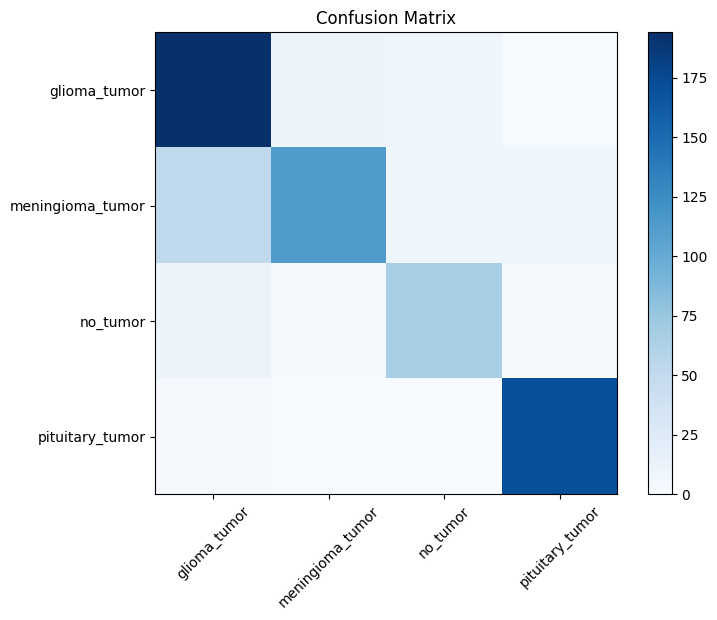

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

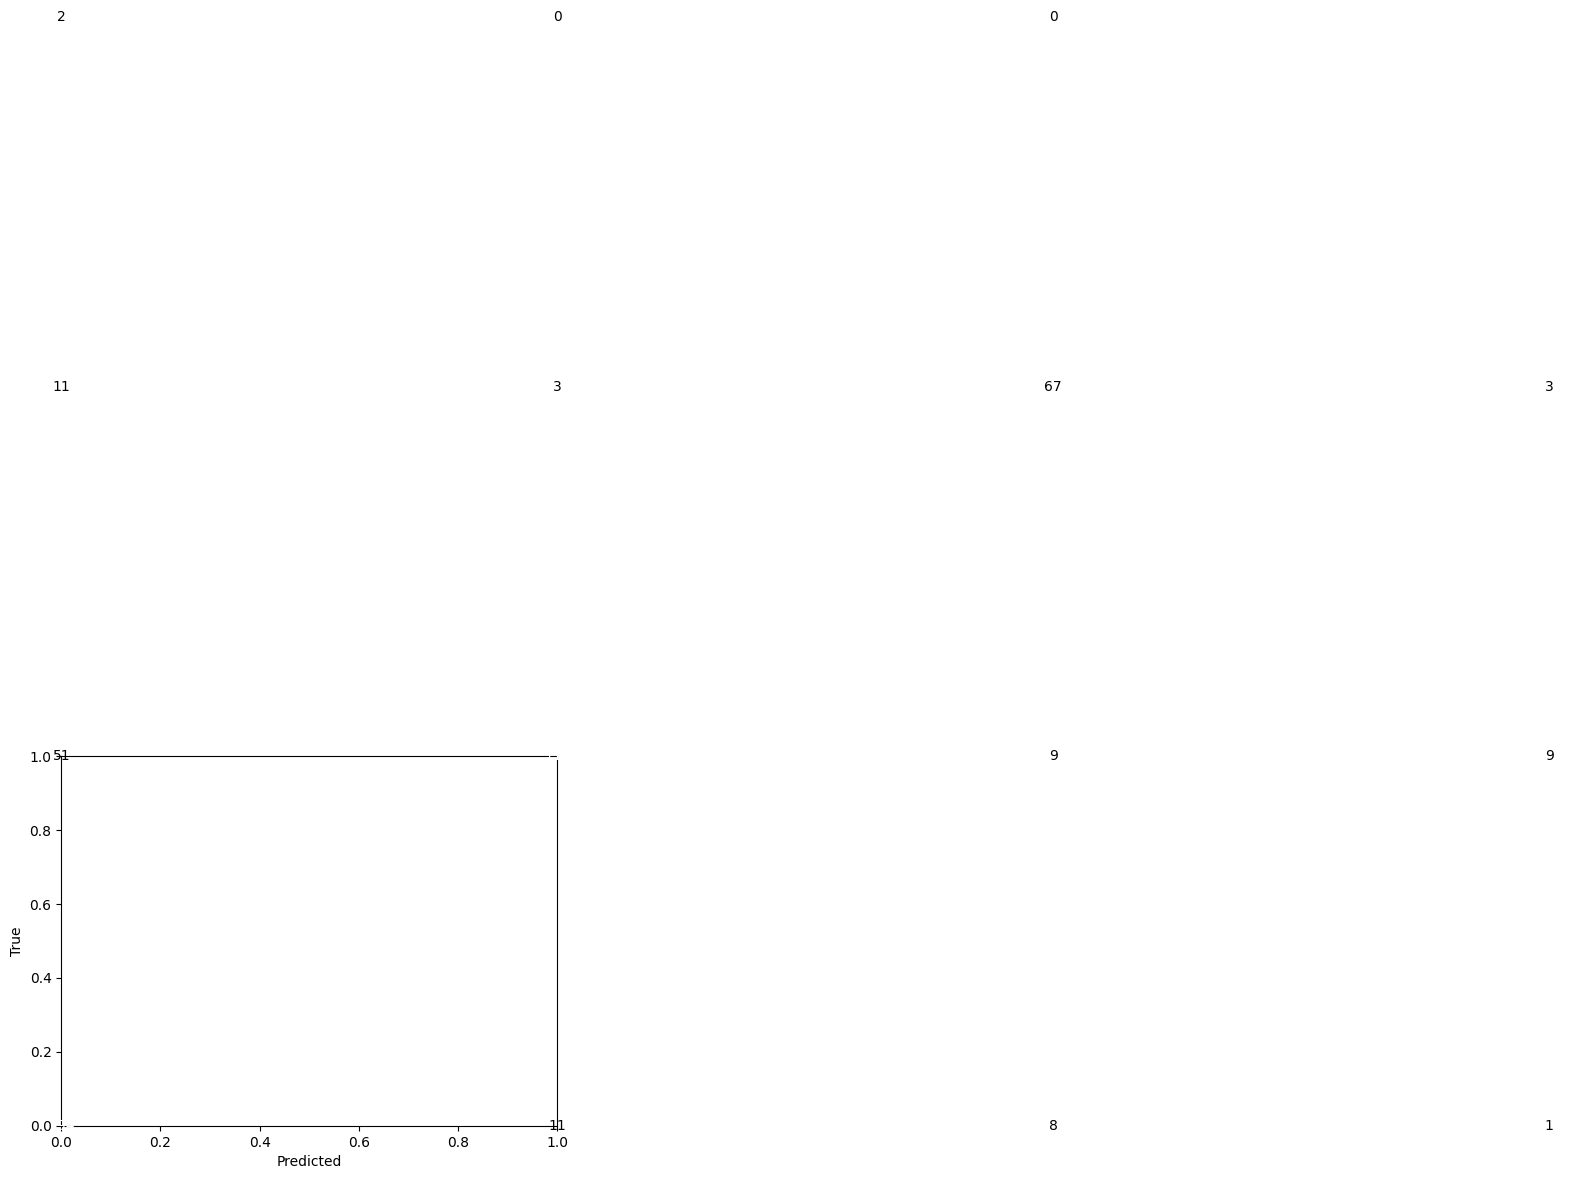

In [24]:
# Add numerical labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()